In [2]:
path_data = '../../data/'

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [3]:
# As of Jan 2017, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# A local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2015-agesex-res.csv'

full_census_table = pd.read_csv(data)
# pandas dataframe nuilt upon the 'data' file

partial_census_table = full_census_table[['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014']]
# df built on 4 columns from full_census_table 

us_pop = partial_census_table.rename(columns={'POPESTIMATE2010':'2010','POPESTIMATE2014':'2014'})
# partial census df with renamed columns

# Example: Trends in Gender

We are now equipped with enough coding skills to examine features and trends in subgroups of the U.S. population. In this example, we will look at the distribution of males and females across age groups. We will continue using the `us_pop` table from the previous section.

In [6]:
us_pop.head()

SEX  AGE     2010     2014
0    0    0  3951330  3949775
1    0    1  3957888  3949776
2    0    2  4090862  3959664
3    0    3  4111920  4007079
4    0    4  4077551  4005716

As we know from having examined this dataset earlier, a [description of the table](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.pdf) appears online. Here is a reminder of what the table contains. 

Each row represents an age group. The `SEX` column contains numeric codes: `0` stands for the total, `1` for male, and `2` for female. The `AGE` column contains ages in completed years, but the special value `999` represents the entire population regardless of age. The rest of the columns contain estimates of the US population.

## Understanding `AGE` = 100
As a preliminary, let's interpret data in the final age category in the table, where `AGE` is 100. The code below extracts the rows for the combined group of men and women (`SEX` code 0) for the highest ages.

In [7]:
# note use of boolean '&' operator - not 'and'
# boolean 'or' = | (aka a 'pipe' character)

us_pop[(us_pop['SEX']== 0) & ((us_pop['AGE'] >= 97) & (us_pop['AGE'] <= 101))]

SEX  AGE   2010   2014
97     0   97  68893  83089
98     0   98  47037  59726
99     0   99  32178  41468
100    0  100  54410  71626

Not surprisingly, the numbers of people are smaller at higher ages – for example, there are fewer 99-year-olds than 98-year-olds. 

It does come as a surprise, though, that the numbers for `AGE` 100 are quite a bit larger than those for age 99. A closer examination of the documentation shows that it's because the Census Bureau used 100 as the code for everyone aged 100 or more. 

The row with `AGE` 100 doesn't just represent 100-year-olds – it also includes those who are older than 100. That is why the numbers in that row are larger than in the row for the 99-year-olds.

### Overall Proportions of Males and Females
We will now begin looking at gender ratios in 2014. First, let's look at all the age groups together. Remember that this means looking at the rows where the "age" is coded 999. The table `all_ages` contains this information. There are three rows: one for the total of both genders, one for males (`SEX` code 1), and one for females (`SEX` code 2).

In [8]:
us_pop_2014 = us_pop.drop(columns=['2010'])
all_ages = us_pop_2014[us_pop_2014['AGE'] == 999]
all_ages

SEX  AGE       2014
101    0  999  318907401
203    1  999  156955337
305    2  999  161952064

Row 0 of `all_ages` contains the total U.S. population in each of the two years. The United States had just under 319 million in 2014.

Row 1 contains the counts for males and Row 2 for females. Compare these two rows to see that in 2014, there were more females than males in the United States. 

The population counts in Row 1 and Row 2 add up to the total population in Row 0. 

For comparability with other quantities, we will need to convert these counts to percents out of the total population. Let's access the total for 2014 and name it. Then, we'll show a population table with a proportion column. Consistent with our earlier observation that there were more females than males, about 50.8% of the population in 2014 was female and about 49.2% male in each of the two years. 

**N.B.** Try - in this case we are setting a value based on a 'slice' of a 'copy' which could lead to problems at some point in further calculations. As this is a practice example we can select the 'mode.chained_assignment' to value None otherwise Pandas will helpfully warn us that there may be a problem now or later. 

In [9]:
pop_2014 = all_ages['2014'].iloc[0]

all_ages['Proportion'] = all_ages['2014']/pop_2014
all_ages.style.format({'Proportion':"{:.2%}"})


### Proportions of Boys and Girls among Infants

When we look at infants, however, the opposite is true. Let's define infants to be babies who have not yet completed one year, represented in the row corresponding to `AGE` 0. Here are their numbers in the population. You can see that male infants outnumbered female infants.

In [10]:
infants = us_pop_2014[us_pop_2014['AGE'] == 0]
infants

SEX  AGE     2014
0      0    0  3949775
102    1    0  2020326
204    2    0  1929449

As before, we can convert these counts to percents out of the total numbers of infants. The resulting table shows that in 2014, just over 51% of infants in the U.S. were male. 

In [11]:
infants_2014 = infants['2014'].loc[0]

infants['Proportion'] = infants['2014']/infants_2014

infants.style.format({'Proportion':"{:.2%}"})

In fact, it has long been observed that the proportion of boys among newborns is slightly more than 1/2. The reason for this is not thoroughly understood, and [scientists are still working on it](http://www.npr.org/sections/health-shots/2015/03/30/396384911/why-are-more-baby-boys-born-than-girls).

### Female:Male Gender Ratio at Each Age

We have seen that while there are more baby boys than baby girls, there are more females than males overall. So it's clear that the split between genders must vary across age groups.

To study this variation, we will separate out the data for the females and the males, and eliminate the row where all the ages are aggregated and `AGE` is coded as 999.

The dfs `females` and `males` contain the data for each the two genders.  

**N.B.** in the following cases we will reset the DataFrame index so that we may eventually carry out a comparison.

In [12]:
females_all_rows = us_pop_2014[us_pop_2014['SEX'] == 2]

females = females_all_rows[females_all_rows['AGE'] != 999]

females = females.reset_index()

females.head()

index  SEX  AGE     2014
0    204    2    0  1929449
1    205    2    1  1931375
2    206    2    2  1935991
3    207    2    3  1957483
4    208    2    4  1961199

In [13]:
males_all_rows = us_pop_2014[us_pop_2014['SEX'] == 1]

males = males_all_rows[males_all_rows['AGE'] != 999]

males = males.reset_index()

males.head()

index  SEX  AGE     2014
0    102    1    0  2020326
1    103    1    1  2018401
2    104    1    2  2023673
3    105    1    3  2049596
4    106    1    4  2044517

The plan now is to compare the number of women and the number of men at each age, for each of the two years. Array and Table methods give us straightforward ways to do this. Both of these DataFrames have one row for each age.

In [14]:
males[['AGE']].head()

AGE
0    0
1    1
2    2
3    3
4    4

In [15]:
females[['AGE']].head()

AGE
0    0
1    1
2    2
3    3
4    4

For any given age, we can get the Female:Male gender ratio by dividing the number of females by the number of males. To do this in one step, we can use `column` to extract the array of female counts and the corresponding array of male counts, and then simply divide one array by the other. Elementwise division will create an array of gender ratios for all the years.

In [18]:
females['2014'][0:10]

0    1929449
1    1931375
2    1935991
3    1957483
4    1961199
5    1962561
6    2024870
7    2032494
8    2015285
9    2010659
Name: 2014, dtype: int64

In [19]:
males['2014'][0:10]

0    2020326
1    2018401
2    2023673
3    2049596
4    2044517
5    2044339
6    2111060
7    2122832
8    2105618
9    2097690
Name: 2014, dtype: int64

In [20]:
(females['2014']/males['2014'])[0:10]

0    0.955019
1    0.956884
2    0.956672
3    0.955058
4    0.959248
5    0.959998
6    0.959172
7    0.957445
8    0.957099
9    0.958511
Name: 2014, dtype: float64

In [21]:
ratios = pd.DataFrame({
    'AGE': females['AGE'],
    '2014 F:M RATIO': (females['2014']/males['2014'])})

ratios.head(10)

AGE  2014 F:M RATIO
0    0        0.955019
1    1        0.956884
2    2        0.956672
3    3        0.955058
4    4        0.959248
5    5        0.959998
6    6        0.959172
7    7        0.957445
8    8        0.957099
9    9        0.958511

You can see from the display that the ratios are all around 0.96 for children aged nine or younger. When the Female:Male ratio is less than 1, there are fewer females than males. Thus what we are seeing is that there were fewer girls than boys in each of the age groups 0, 1, 2, and so on through 9. Moreover, in each of these age groups, there were about 96 girls for every 100 boys.

So how can the overall proportion of females in the population be higher than the males? 

Something extraordinary happens when we examine the other end of the age range. Here are the Female:Male ratios for people aged more than 75.

In [22]:
(ratios[ratios['AGE'] > 75]).head(10)

AGE  2014 F:M RATIO
76   76        1.234867
77   77        1.257965
78   78        1.282442
79   79        1.316273
80   80        1.341383
81   81        1.379669
82   82        1.419317
83   83        1.465520
84   84        1.520484
85   85        1.575604

10Not only are all of these ratios greater than 1, signifying more women than men in all of these age groups, many of them are considerably greater than 1. 

- At ages 89 and 90 the ratios are close to 2, meaning that there were about twice as many women as men at those ages in 2014.
- At ages 98 and 99, there were about 3.5 to 4 times as many women as men. 

If you are wondering how many people there were at these advanced ages, you can use Python to find out:

In [23]:
males[(males['AGE'] >= 98) & (males['AGE'] <= 100)]

index  SEX  AGE   2014
98     200    1   98  13518
99     201    1   99   8951
100    202    1  100  13618

In [24]:
females[(females['AGE'] >= 98) & (females['AGE'] <= 100)]

index  SEX  AGE   2014
98     302    2   98  46208
99     303    2   99  32517
100    304    2  100  58008

The graph below shows the gender ratios plotted against age. The blue curve shows the 2014 ratio by age.

The ratios are almost 1 (signifying close to equal numbers of males and females) for ages 0 through 60, but they start shooting up dramatically (more females than males) starting at about age 65.

That females outnumber males in the U.S. is partly due to the marked gender imbalance in favor of women among senior citizens.

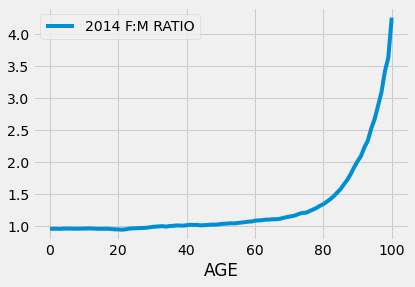

In [25]:
ratios.plot('AGE')
plt.show()